# Find the best profile for electric car motor temperatures


First things first, the imports and the data:

In [1]:
import cufflinks as cf
import plotly.offline
import pandas as pd
import numpy as np

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
data = pd.read_csv("pmsm_temperature_data.csv") 
data.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


## Column Description

Before we get to know our data better lets first clear what all this features mean:

**ambient:** Ambient temperature as measured by a thermal sensor located closely to the stator.  
**coolant:** Coolant temperature. The motor is water cooled. Measurement is taken at outflow.  
**u_d:** Voltage d-component  
**u_q:** Voltage q-component  
**motor_speed:** Motor speed  
**torque:** Torque induced by c urrent.  
**i_d:** Current d-component  
**i_q:** Current q-component  
**pm:** Permanent Magnet surface temperature representing the rotor temperature. This was measured with an infrared thermography unit.  
**stator_yoke:** Stator yoke temperature measured with a thermal sensor.  
**stator_tooth:** Stator tooth temperature measured with a thermal sensor.  
**stator_winding:** Stator winding temperature measured with a thermal sensor.  
**profile_id:** Each measurement session has a unique ID. Make sure not to try to estimate from one session onto the other as they are  

## Goal

Get a overview of the coorelation of the data which features make sense to keep which are redundant/ have a lot na values. Final goal is it to find the best settings how our motor can be most energie efficient, lets see how far we can get!

## Visual inspection


### Histogram

Probably one of the easiest visualisation, a histogram of a feature:


(array([1.09568568e-03, 1.31415951e+00, 1.04994204e-01, 4.12444589e-01,
        3.38168892e-01, 2.31774373e-01, 3.37854435e-01, 2.22193265e-01,
        4.45310247e-01, 2.54921347e-01, 8.58909482e-02, 2.45772617e-01,
        1.57203872e-01, 1.44861440e-01, 7.38924530e-02, 2.22561769e-01,
        1.18594464e-01, 1.83716518e-01, 8.48542232e-03, 9.82677744e-06]),
 array([-1.42934930e+00, -1.22543022e+00, -1.02151113e+00, -8.17592045e-01,
        -6.13672960e-01, -4.09753875e-01, -2.05834790e-01, -1.91570500e-03,
         2.02003380e-01,  4.05922465e-01,  6.09841550e-01,  8.13760635e-01,
         1.01767972e+00,  1.22159880e+00,  1.42551789e+00,  1.62943697e+00,
         1.83335606e+00,  2.03727514e+00,  2.24119423e+00,  2.44511331e+00,
         2.64903240e+00]),
 <a list of 20 Patch objects>)

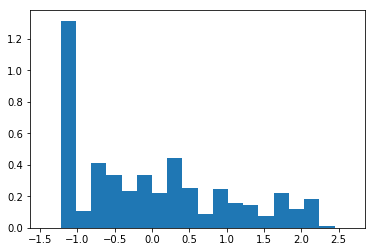

In [17]:
plt.rcParams.update({'font.size': 12})
%matplotlib inline

plt.hist(data["coolant"], normed=True, bins=20)

The values of the data do not appear to make a lot of sense to me, they might have been scaled using normalization, we can check that easy by using the build in pandas function *describe*, this will give us among other things the mean of the data which should be 0 and the standard deviation which should be somewhere 1:

In [6]:
data.describe().round(2)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.00,998070.00,998070.00,998070.00,998070.00,998070.00,998070.00,998070.00,998070.00,998070.00,998070.00,998070.00,998070.00
mean,-0.00,0.00,0.00,-0.01,-0.01,-0.00,0.01,-0.00,-0.00,0.00,-0.00,-0.00,50.73
std,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,22.07
min,-8.57,-1.43,-1.66,-1.86,-1.37,-3.35,-3.25,-3.34,-2.63,-1.83,-2.07,-2.02,4.00
25%,-0.60,-1.04,-0.83,-0.93,-0.95,-0.27,-0.76,-0.26,-0.67,-0.75,-0.76,-0.73,32.00
50%,0.27,-0.18,0.27,-0.10,-0.14,-0.19,0.21,-0.19,0.09,-0.06,0.01,0.01,56.00
75%,0.69,0.65,0.36,0.85,0.85,0.55,1.01,0.50,0.68,0.70,0.77,0.73,68.00
max,2.97,2.65,2.27,1.79,2.02,3.02,1.06,2.91,2.92,2.45,2.33,2.65,81.00


Exactly what I expected, the mean of all values (except the profile_id) is zero, and the standard deviation (std in the table above) is 1.

### Heatmap

Lets start with a simple heatmap, this will give us some first insights in the correlation of the data:

In [7]:
data.corr().iplot(kind='heatmap',colorscale="blues", title="Feature Correlation Matrix")


### Distplot

Next lets give a distplot a try, this gives us a deeper insights in the correlation between the single datapoints!

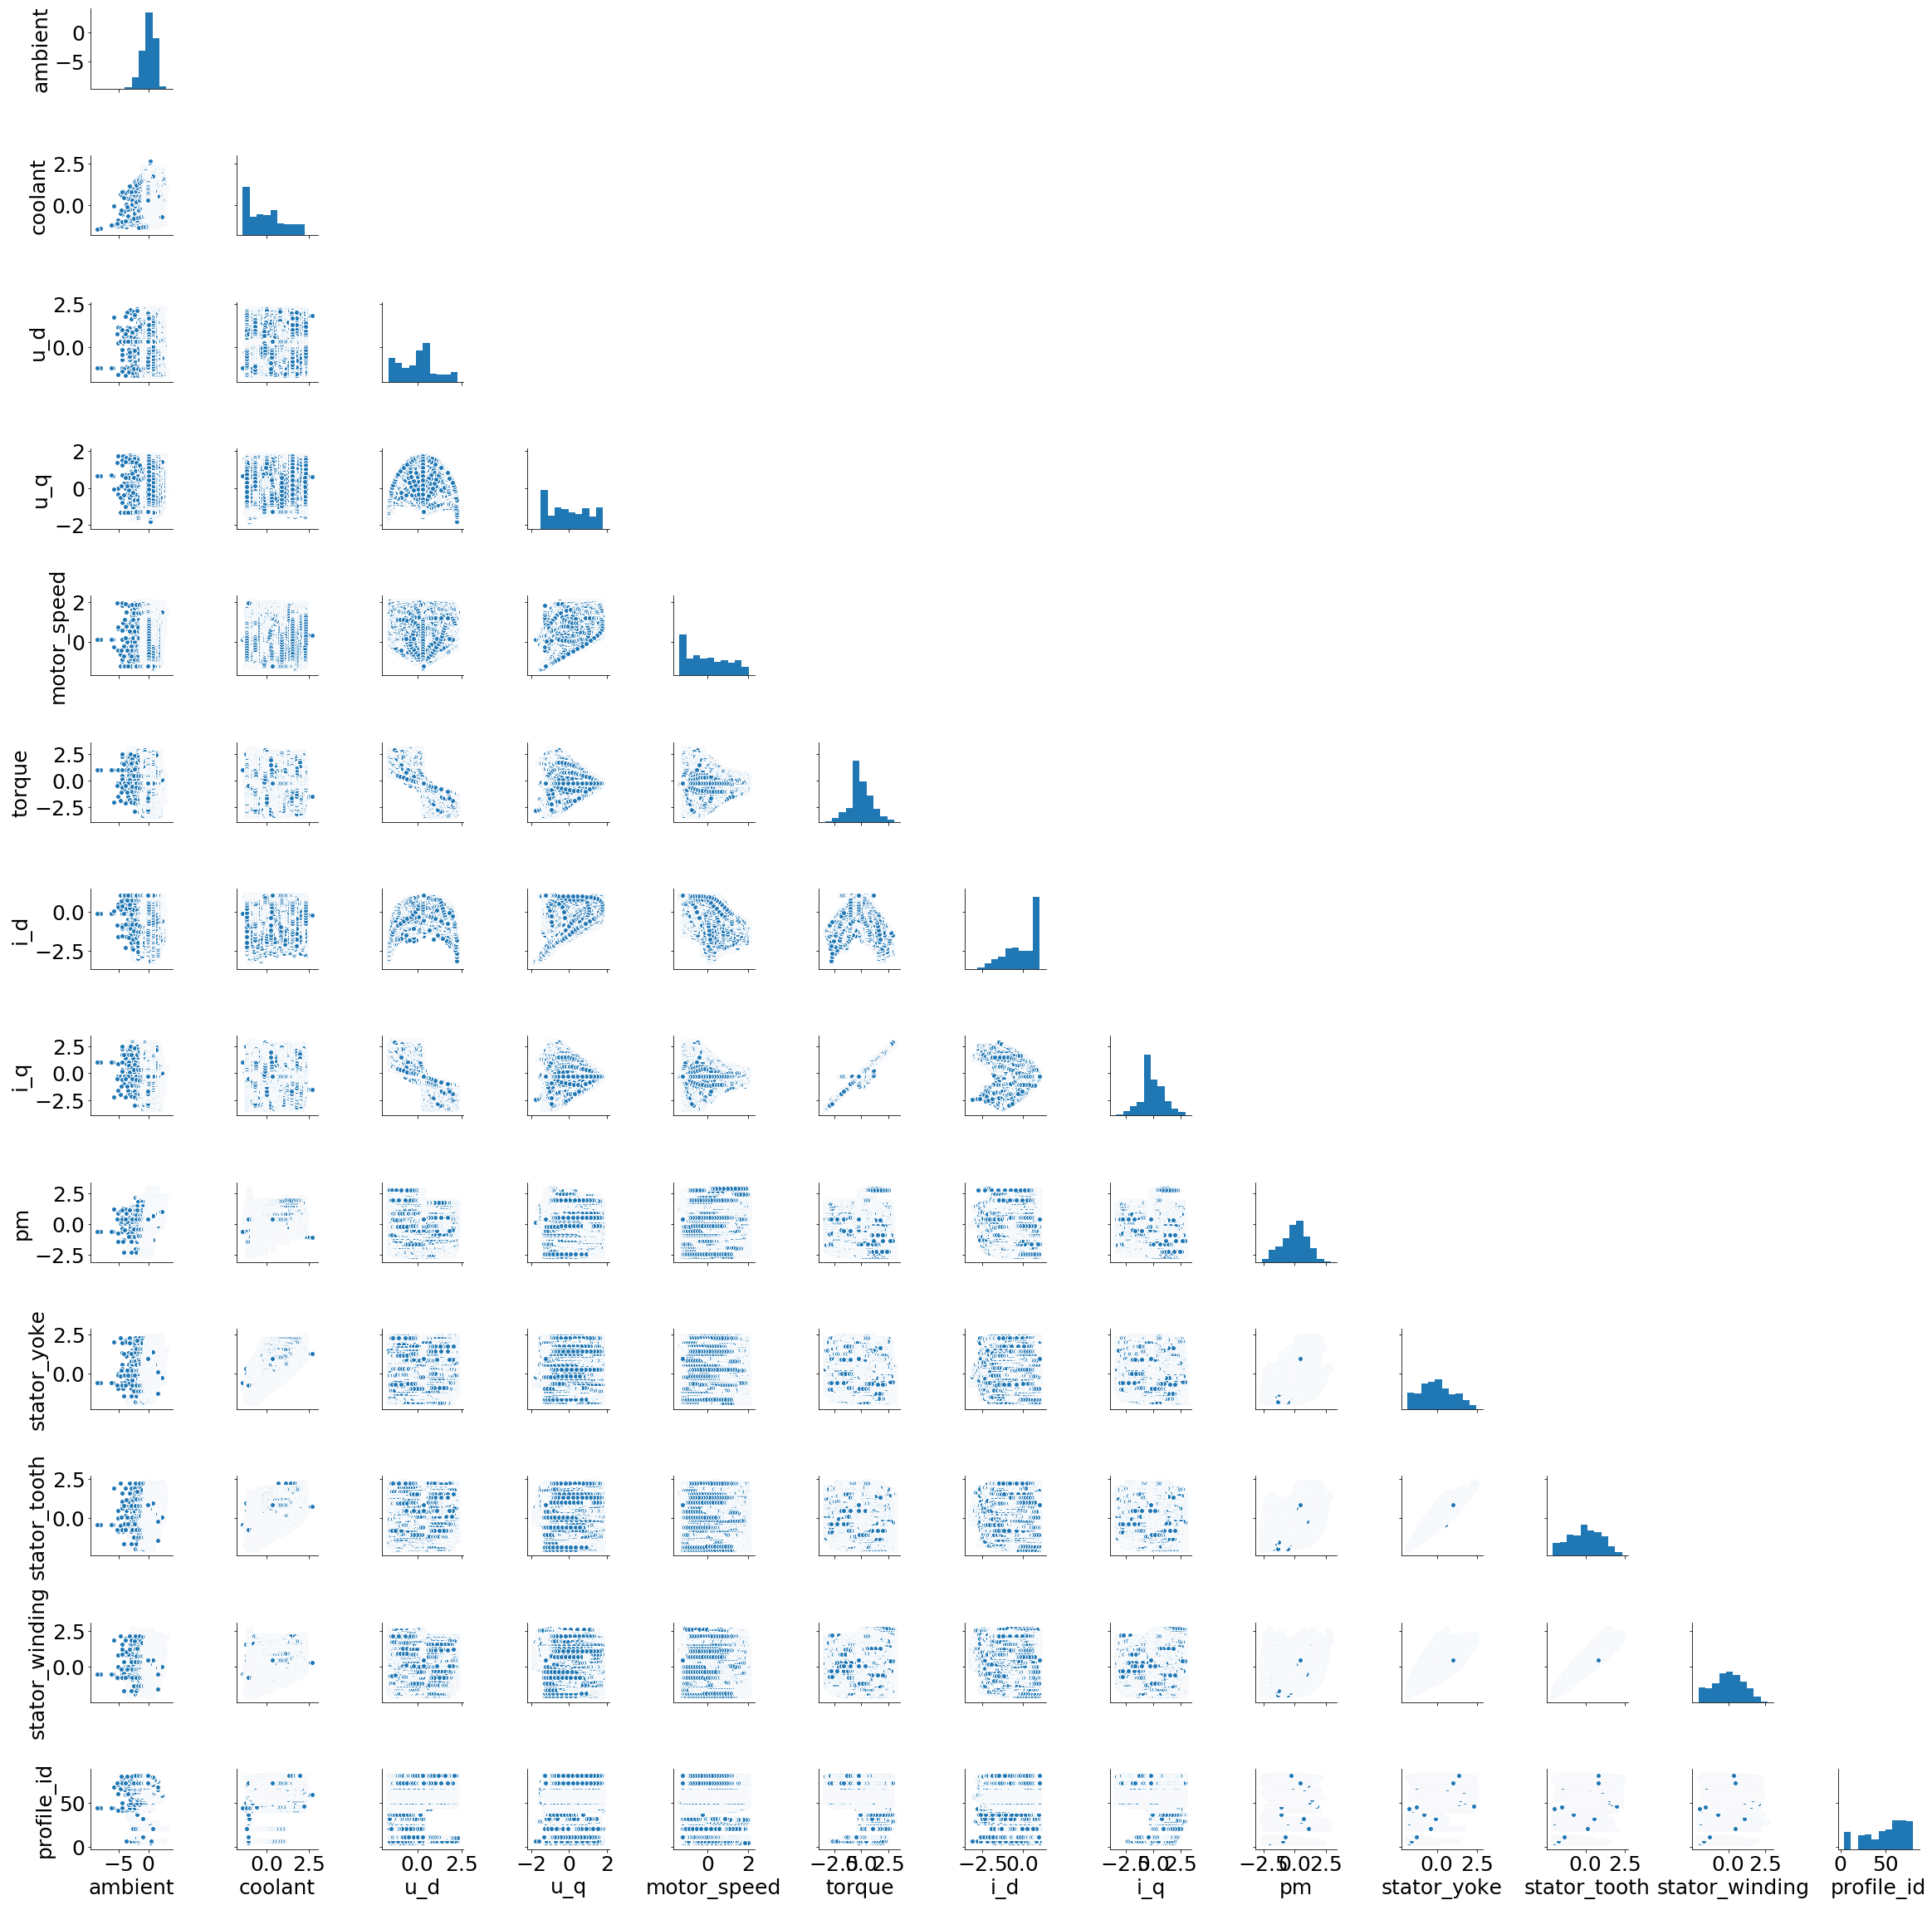

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 25})

g = sns.pairplot(data, size=2.5)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

## PCA



PCA (Principal Component Analysis) tells us basically how many features we realldy need, and which we could drop.

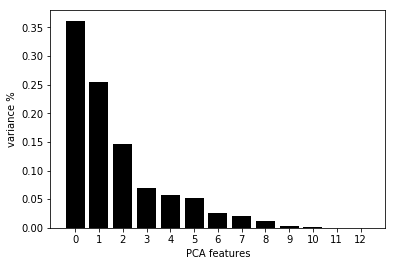

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(data)
# Create a PCA instance: pca
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

We  see a big drop after the first **three features** and then again a smaller, but anyway bigger as normal, drop after **5** features, lets take make another check with another Method:

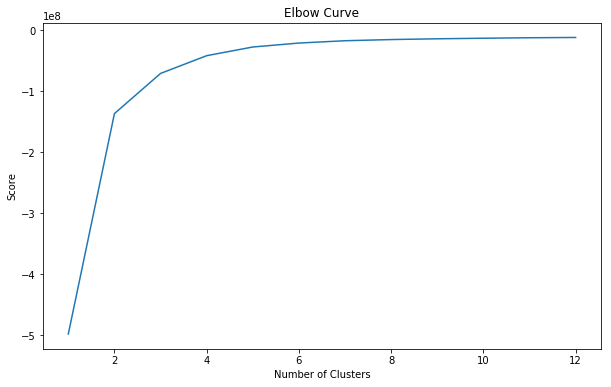

In [10]:
from sklearn.cluster import KMeans

data_cluster = data
n_cluster = range(1, 13)
kmeans = [KMeans(n_clusters=i).fit(data_cluster) for i in n_cluster]
scores = [kmeans[i].score(data_cluster) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();


The *elbow point* which is the important point to look at is here as well at **three features**, interesting to see is that the difference from features 4 to 5 is not visible here the same as in the PCA analysis.

Anyway, lets take a look at our data:

Text(0,0.5,'PCA 2')

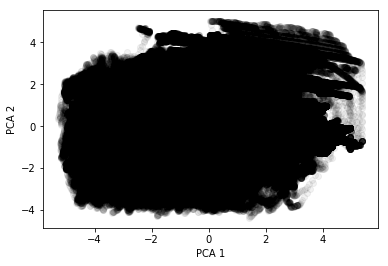

In [11]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.05, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

No clear structure is visible in 2 Dimensions, lets try three:

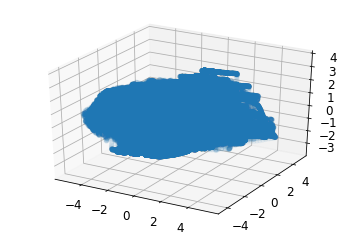

In [12]:
from mpl_toolkits.mplot3d import Axes3D 

plt.rcParams.update({'font.size': 12})


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(PCA_components[0], PCA_components[1], PCA_components[2], alpha=.05)

plt.show()

No patterns as well... maybe a *4th dimension* will give us some clearness:

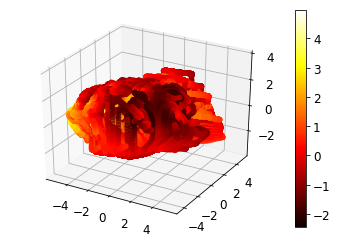

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = PCA_components[0]
y = PCA_components[1]
z = PCA_components[2]
c = PCA_components[3]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()